# Final Project 

## Depp Leearning - COMP 4531 

## Jorge Rodriguez 


In [905]:
import os
input_dir = "./images/"
target_dir = "./annotations/trimaps/"
input_img_paths = sorted(
    [os.path.join(input_dir, fname)
for fname in os.listdir(input_dir) if fname.endswith(".jpg")])

In [906]:
input_img_paths

['./images/adidas_100.jpg',
 './images/adidas_101.jpg',
 './images/adidas_102.jpg',
 './images/adidas_103.jpg',
 './images/adidas_104.jpg',
 './images/adidas_105.jpg',
 './images/adidas_106.jpg',
 './images/adidas_107.jpg',
 './images/adidas_108.jpg',
 './images/adidas_109.jpg',
 './images/adidas_110.jpg',
 './images/adidas_111.jpg',
 './images/adidas_112.jpg',
 './images/adidas_113.jpg',
 './images/adidas_114.jpg',
 './images/adidas_115.jpg',
 './images/adidas_116.jpg',
 './images/adidas_117.jpg',
 './images/adidas_118.jpg',
 './images/adidas_119.jpg',
 './images/adidas_120.jpg',
 './images/adidas_121.jpg',
 './images/adidas_122.jpg',
 './images/adidas_123.jpg',
 './images/adidas_124.jpg',
 './images/adidas_125.jpg',
 './images/adidas_126.jpg',
 './images/adidas_127.jpg',
 './images/adidas_128.jpg',
 './images/adidas_129.jpg',
 './images/adidas_130.jpg',
 './images/adidas_131.jpg',
 './images/adidas_132.jpg',
 './images/adidas_133.jpg',
 './images/adidas_134.jpg',
 './images/adidas_13

In [907]:
target_paths = sorted(
    [os.path.join(target_dir, fname)
for fname in os.listdir(target_dir)
if fname.endswith(".png") and not fname.startswith(".")])


In [908]:
target_paths

['./annotations/trimaps/adidas_100.png',
 './annotations/trimaps/adidas_101.png',
 './annotations/trimaps/adidas_102.png',
 './annotations/trimaps/adidas_103.png',
 './annotations/trimaps/adidas_104.png',
 './annotations/trimaps/adidas_105.png',
 './annotations/trimaps/adidas_106.png',
 './annotations/trimaps/adidas_107.png',
 './annotations/trimaps/adidas_108.png',
 './annotations/trimaps/adidas_109.png',
 './annotations/trimaps/adidas_110.png',
 './annotations/trimaps/adidas_111.png',
 './annotations/trimaps/adidas_112.png',
 './annotations/trimaps/adidas_113.png',
 './annotations/trimaps/adidas_114.png',
 './annotations/trimaps/adidas_115.png',
 './annotations/trimaps/adidas_116.png',
 './annotations/trimaps/adidas_117.png',
 './annotations/trimaps/adidas_118.png',
 './annotations/trimaps/adidas_119.png',
 './annotations/trimaps/adidas_120.png',
 './annotations/trimaps/adidas_121.png',
 './annotations/trimaps/adidas_122.png',
 './annotations/trimaps/adidas_123.png',
 './annotations/

In [909]:
input_img_paths = input_img_paths[:len(target_paths)]

In [910]:
len(input_img_paths), len(target_paths)

(711, 711)

In [929]:
for i in range(20):
    print(input_img_paths[i], "|", target_paths[i])


./images/adidas_100.jpg | ./annotations/trimaps/adidas_100.png
./images/adidas_101.jpg | ./annotations/trimaps/adidas_101.png
./images/adidas_102.jpg | ./annotations/trimaps/adidas_102.png
./images/adidas_103.jpg | ./annotations/trimaps/adidas_103.png
./images/adidas_104.jpg | ./annotations/trimaps/adidas_104.png
./images/adidas_105.jpg | ./annotations/trimaps/adidas_105.png
./images/adidas_106.jpg | ./annotations/trimaps/adidas_106.png
./images/adidas_107.jpg | ./annotations/trimaps/adidas_107.png
./images/adidas_108.jpg | ./annotations/trimaps/adidas_108.png
./images/adidas_109.jpg | ./annotations/trimaps/adidas_109.png
./images/adidas_110.jpg | ./annotations/trimaps/adidas_110.png
./images/adidas_111.jpg | ./annotations/trimaps/adidas_111.png
./images/adidas_112.jpg | ./annotations/trimaps/adidas_112.png
./images/adidas_113.jpg | ./annotations/trimaps/adidas_113.png
./images/adidas_114.jpg | ./annotations/trimaps/adidas_114.png
./images/adidas_115.jpg | ./annotations/trimaps/adidas_

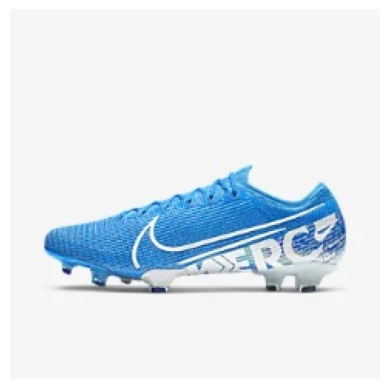

In [912]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
plt.axis("off")
plt.imshow(load_img(input_img_paths[500]))

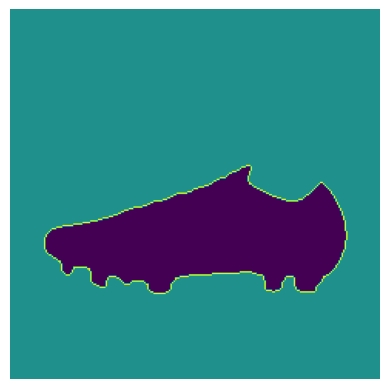

In [913]:
def display_target(target_array):
    normalized_array = (target_array.astype("uint8") - 1) * 127 
    plt.axis("off")
    plt.imshow(normalized_array[:, :, 0])

img = img_to_array(load_img(target_paths[500], color_mode="grayscale"))
display_target(img)

In [914]:
import numpy as np 
import random

In [915]:
img_size = (200, 200)
num_imgs = len(input_img_paths)

In [837]:
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

In [916]:
def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

In [917]:
def path_to_target(path): 
    img = img_to_array(load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1 
    return img

In [918]:
input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")
for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])

val_samples = 100

train_input_imgs = input_imgs[:-val_samples]
train_targets = targets[:-val_samples]
val_input_imgs = input_imgs[-val_samples:]
val_targets = targets[-val_samples:]



In [919]:
train_input_imgs.shape

(611, 200, 200, 3)

In [920]:
train_targets.shape

(611, 200, 200, 1)

In [921]:
val_input_imgs.shape

(100, 200, 200, 3)

In [922]:
val_targets.shape


(100, 200, 200, 1)

In [923]:
from tensorflow import keras
from tensorflow.keras import layers


In [924]:
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))
    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(64, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, strides=2, padding="same", activation="relu")(x)

    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same", strides=2)(x)

    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    model = keras.Model(inputs, outputs) 
    return model


In [925]:
model = get_model(img_size=img_size, num_classes=3) 
model.summary()

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_23 (Rescaling)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_138 (Conv2D)             │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_139 (Conv2D)             │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_140 (Conv2D)             │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_141 (Conv2D)             │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_142 (Conv2D)             │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_138            │ (None, 25, 25, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_139            │ (None, 50, 50, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_140            │ (None, 50, 50, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_141            │ (None, 100, 100, 128)  │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_142            │ (None, 100, 100, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_143            │ (None, 200, 200, 64)   │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_143 (Conv2D)             │ (None, 200, 200, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,290,563 (8.74 MB)

 Trainable params: 2,290,563 (8.74 MB)

 Non-trainable params: 0 (0.00 B)

In [926]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")


In [930]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jorge_tenis_711_segmentation_no_shuffle.keras",
                                    save_best_only=True)
]

In [931]:
history = model.fit(train_input_imgs, train_targets,
                    epochs=100,
                    callbacks=callbacks,
                    batch_size=32,
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - loss: 1.2758 - val_loss: 0.8389
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - loss: 0.7752 - val_loss: 0.7370
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 0.7447 - val_loss: 0.7367
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - loss: 0.7520 - val_loss: 0.7307
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 0.7410 - val_loss: 0.7551
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 0.7405 - val_loss: 0.7353
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 0.7363 - val_loss: 0.9068
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 0.7730 - val_loss: 0.7323
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 0.7389 - val_loss: 0.7289
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 0.7341 - val_loss: 0.7263
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 0.7299 - val_loss: 0.7261
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 0.7

In [932]:
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]

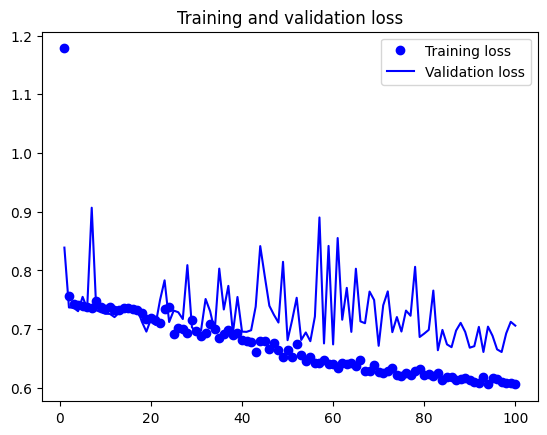

In [933]:
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

# This Section of the code, is to used for all the training models created before using the code above and saved, so we can iterate one by one and see how the models behave on the same image 

## Model Selections and Images Selection:

In [1066]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import array_to_img

## This function prints the images on subplot from a list of images

In [1110]:

def show_images(images: list[np.ndarray], labels) -> None:
    n: int = len(images)
    f = plt.figure(figsize=(20, 20))
    #f.suptitle("Images", fontsize=3)
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        f.axes[i].axis("off")
        f.axes[i].set_title(labels[i])
        plt.imshow(images[i])

    plt.legend()
    plt.show(block=True)

## This function gets the mask for the predictd image.

In [1068]:
def get_mask(pred):
    mask = np.argmax(pred, axis=-1)
    mask *= 127
    return mask

## This section is where you or the code can select random pictures (1 to 99) and then dispaly how the model behaves on the different trainned model saved before. simply run Code A) and then B) and you can run in multiple times....

# A) Select a Random Image from the Trainning Images...

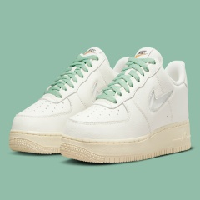

In [1183]:
random.randint(1,99)
random_int = random.randint(1,99)
# random_int = 99
test_image = val_input_imgs[random_int]
array_to_img(test_image)

## B) Shows the prediction based on trained model with 10, 161, 207, 711, 711B(no shuffle) Images:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_13689/1095942605.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


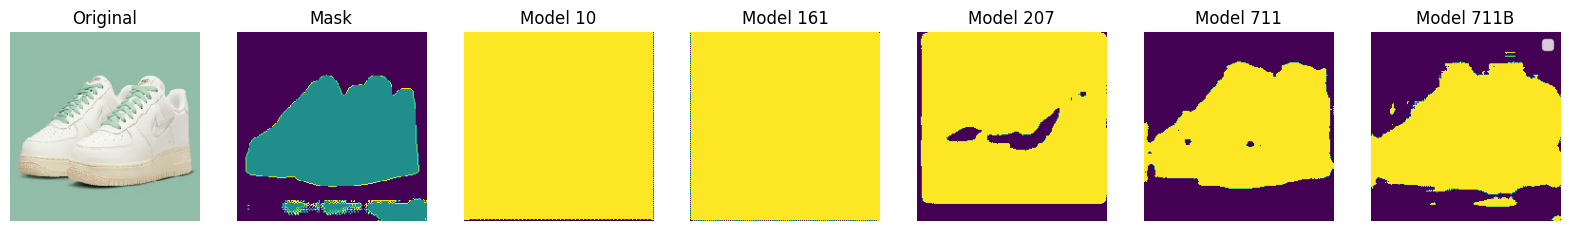

In [1184]:
images = []
labels = ['Original', 'Mask'] 
images.append(array_to_img(test_image))
images.append(array_to_img(val_targets[random_int]))
for model_no in ['10', '161', '207', '711', '711B']:
    model = keras.models.load_model(f"jorge_tenis_{model_no}_segmentation.keras")
    pred = model.predict(np.expand_dims(test_image, 0))[0]
    mask = get_mask(pred)
    images.append((mask))
    labels.append(f"Model {model_no}")  

show_images(images,labels)   



In [1185]:
print(random_int)

35


In [1186]:
print("D O N E")

D O N E
